In [48]:
import sys
sys.path.append('utils/')

import pandas as pd
import numpy as np
# I have in utils/ the file Metrica_IO and i want to import it
from utils import Metrica_IO as mio
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [13]:
DATA_DIR= "data/"
game_id=2
home_xy, away_xy, events =mio.read_match_data(DATA_DIR,game_id)

Reading team: home
Reading team: away


In [14]:
home_xy.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23339,0.25869,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23339,0.25869,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23339,0.25869,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23254,0.25870,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23170,0.25871,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
away_xy.head()

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_20_x,Away_20_y,Away_21_x,Away_21_y,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,0.38954,0.36505,0.31049,0.49564,0.91364,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
2,1,0.08,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,0.38954,0.36505,0.31049,0.49564,0.91364,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
3,1,0.12,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,0.38954,0.36505,0.31049,0.49564,0.91364,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
4,1,0.16,0.01218,0.51763,0.32836,0.81847,0.30734,0.55182,0.32235,0.38954,0.36505,0.31049,0.49564,0.91364,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
5,1,0.20,0.01218,0.51763,0.32783,0.81847,0.30734,0.55182,0.32235,0.38954,0.36505,0.31049,0.49564,0.91364,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN


In [16]:
events.head(15)

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58
5,Away,PASS,NaN,1,395,15.80,423,16.92,Player16,Player15,0.26,0.66,0.27,0.91
6,Away,BALL LOST,INTERCEPTION,1,451,18.04,504,20.16,Player15,NaN,0.26,0.92,0.64,0.93
7,Away,CHALLENGE,GROUND-LOST,1,504,20.16,504,20.16,Player23,NaN,0.61,0.93,NaN,NaN
8,Home,CHALLENGE,GROUND-WON,1,504,20.16,504,20.16,Player3,NaN,0.62,0.92,NaN,NaN
9,Home,RECOVERY,INTERCEPTION,1,504,20.16,504,20.16,Player3,NaN,0.62,0.92,NaN,NaN


In [17]:
# Change the coordinates to have the origin in the center of the field
home_xy=mio.to_metric_coordinates(home_xy)
away_xy=mio.to_metric_coordinates(away_xy)
events=mio.to_metric_coordinates(events)

# GIF

In [18]:
from utils.PlotPitch import PlotPitch

In [22]:
# Plotting the convex hulls for all frames from 1000 to 1200
for frame in range(0,2101):
    #--------------------------------------------------------------------
    # Retrieve the data for the frame
    home_data=home_xy.iloc[frame,:]
    away_data=away_xy.iloc[frame,:]
    home_data=home_data.dropna()
    away_data=away_data.dropna()
    ball=np.array(home_data[-2:])
    home_data= home_data[4:-2] #exclude both the goalkeeper and the ball
    away_data= away_data[4:-2] #exclude both the goalkeeper and the ball
    #--------------------------------------------------------------------
    # divide x and y
    home_data_x=home_data[home_data.index.str.contains('_x')]
    home_data_y=home_data[home_data.index.str.contains('_y')]
    away_data_x=away_data[away_data.index.str.contains('_x')]
    away_data_y=away_data[away_data.index.str.contains('_y')]
    #--------------------------------------------------------------------
    # Coordinates
    home_pts= np.array([[x,y] for x,y in zip(home_data_x,home_data_y)])
    away_pts= np.array([[x,y] for x,y in zip(away_data_x,away_data_y)])
    #--------------------------------------------------------------------
    curr_plot=PlotPitch(home_pts=home_pts, away_pts=away_pts, ball=ball,plotHulls=True,plotAllPlayers=True)
    #save it
    curr_plot.savefig(f'figs/convex_hulls_{frame}.png', dpi=300, bbox_inches='tight')

In [1]:
# From
import glob
from PIL import Image
from IPython.display import Image as IPImage
from IPython.display import display

# Load all the saved images
image_files = sorted(glob.glob('figs/convex_hulls_*.png'), key=lambda x: int(x.split('_')[-1].split('.')[0]))[50:200]

# Create a list of images
# Desired GIF dimensions
gif_width = 1200
gif_height = 700
images = [Image.open(image).resize((gif_width, gif_height), Image.Resampling.LANCZOS) for image in image_files]

# Save as a GIF
gif_path = 'gifs/convex_hulls.gif'
images[0].save(gif_path, save_all=True, append_images=images[50:200], duration=0.0001, loop=0)

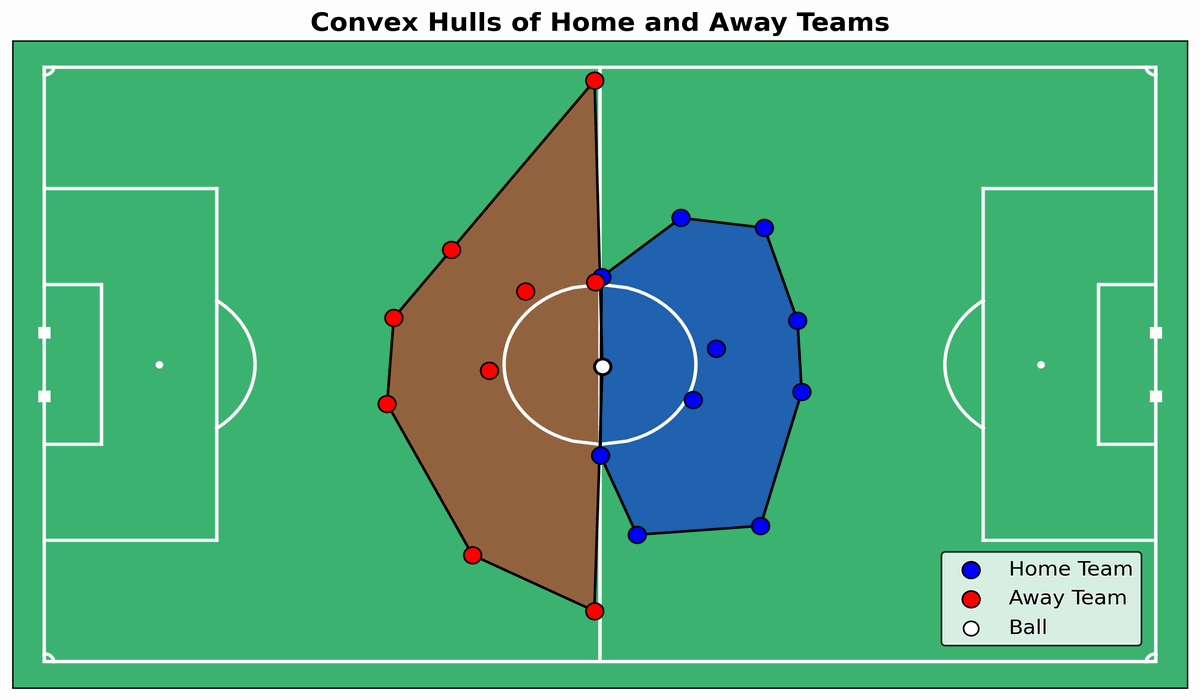

In [3]:
# Display the GIF
display(IPImage(filename=gif_path))

From frame 49 inizia veramente la partita...

# Get the convex hull areas

In [49]:
hulls_df=pd.DataFrame(columns=['frame','Time [s]','home_hull','away_hull'])
for frame in range(0,2101):
    time=home_xy.iloc[0,:]['Time [s]']
    home_data=home_xy.iloc[frame,:]
    away_data=away_xy.iloc[frame,:]
    home_data=home_data.dropna()
    away_data=away_data.dropna()
    ball=np.array(home_data[-2:])
    home_data= home_data[4:-2] #exclude both the goalkeeper and the ball
    away_data= away_data[4:-2] #exclude both the goalkeeper and the ball
    #--------------------------------------------------------------------
    # divide x and y
    home_data_x=home_data[home_data.index.str.contains('_x')]
    home_data_y=home_data[home_data.index.str.contains('_y')]
    away_data_x=away_data[away_data.index.str.contains('_x')]
    away_data_y=away_data[away_data.index.str.contains('_y')]
    #--------------------------------------------------------------------
    # Coordinates
    home_pts= np.array([[x,y] for x,y in zip(home_data_x,home_data_y)])
    away_pts= np.array([[x,y] for x,y in zip(away_data_x,away_data_y)])
    # Compute the convex hulls
    home_hull=ConvexHull(home_pts)
    away_hull=ConvexHull(away_pts)
    # Compute the area of the convex hulls
    home_area=home_hull.volume
    away_area=away_hull.volume
    
    hulls_df.loc[frame]=[frame,time,home_area,away_area]
    
    

In [50]:
hulls_df.head(20)

,frame,Time [s],home_hull,away_hull
0,0.0,0.04,992.715829,889.255889
1,1.0,0.04,992.715829,889.255889
2,2.0,0.04,992.715829,889.255889
3,3.0,0.04,994.135468,889.979875
4,4.0,0.04,995.538356,890.670995
5,5.0,0.04,996.907743,891.362114
6,6.0,0.04,1034.857627,851.999534
7,7.0,0.04,1042.910562,847.467501
8,8.0,0.04,1047.663507,846.497910
9,9.0,0.04,1050.026337,846.618074
